# Parte 1

> Dado el archivo de registros de jugadas (eventos) de MemPy, mostrar un gráfico con los 3 (tres) usuarios que más tiempo jugaron el juego (independientemente del resultado de la partida.

In [1]:
import pandas as pd

# Cargo el dataset.
datos = pd.read_csv('datos de prueba.csv')

datos

,Tiempo,Partida,Cantidad total de palabras a adivinar,Nombre de evento,Usuarie - nick,usuarie -genero,usuarie -edad,Estado,Palabra,nivel
0,1621436490,1,5,inicio_partida,pepe,masculino,22,NaN,NaN,medio
1,1621436491,1,5,intento,pepe,masculino,22,error,CASA,medio
2,1621436492,1,5,intento,pepe,masculino,22,error,CASA,medio
3,1621436493,1,5,intento,pepe,masculino,22,ok,CASA,medio
4,1621436494,1,5,intento,pepe,masculino,22,error,PERRO,medio
...,...,...,...,...,...,...,...,...,...,...
89,1621449118,7,6,intento,flor,femenino,22,ok,MESA,difícil
90,1621449119,7,6,intento,flor,femenino,22,ok,PERRO,difícil
91,1621449120,7,6,intento,flor,femenino,22,ok,GATO,difícil
92,1621449121,7,6,intento,flor,femenino,22,ok,MOCHILA,difícil


In [2]:
# Solo necesito las filas en las que el evento es inicio/fin.
datos = datos[datos['Nombre de evento'].isin(['inicio_partida', 'fin'])]

datos

,Tiempo,Partida,Cantidad total de palabras a adivinar,Nombre de evento,Usuarie - nick,usuarie -genero,usuarie -edad,Estado,Palabra,nivel
0,1621436490,1,5,inicio_partida,pepe,masculino,22,NaN,NaN,medio
19,1621436511,1,5,fin,pepe,masculino,22,timeout,NaN,medio
20,1621436512,2,4,inicio_partida,jose,no binarie,15,NaN,NaN,fácil
32,1621436524,2,4,fin,jose,no binarie,15,finalizada,NaN,fácil
33,1621446323,3,6,inicio_partida,clementina,femenino,45,NaN,NaN,difícil
45,1621446335,3,6,fin,clementina,femenino,45,finalizada,NaN,difícil
46,1621446336,4,6,inicio_partida,jose,no binarie,15,NaN,NaN,difícil
63,1621446353,4,6,fin,jose,no binarie,15,timeout,NaN,difícil
64,1621436554,5,4,inicio_partida,clara,trans,31,NaN,NaN,fácil
76,1621436569,5,4,fin,clara,trans,31,finalizada,NaN,fácil


In [3]:
# En los eventos de fin, dejo la cantidad de segundos jugados.
datos.loc[:, 'Tiempo'] = datos.loc[:, 'Tiempo'].diff(1)

datos

c:\users\prisc\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Tiempo,Partida,Cantidad total de palabras a adivinar,Nombre de evento,Usuarie - nick,usuarie -genero,usuarie -edad,Estado,Palabra,nivel
0,NaN,1,5,inicio_partida,pepe,masculino,22,NaN,NaN,medio
19,21.0,1,5,fin,pepe,masculino,22,timeout,NaN,medio
20,1.0,2,4,inicio_partida,jose,no binarie,15,NaN,NaN,fácil
32,12.0,2,4,fin,jose,no binarie,15,finalizada,NaN,fácil
33,9799.0,3,6,inicio_partida,clementina,femenino,45,NaN,NaN,difícil
45,12.0,3,6,fin,clementina,femenino,45,finalizada,NaN,difícil
46,1.0,4,6,inicio_partida,jose,no binarie,15,NaN,NaN,difícil
63,17.0,4,6,fin,jose,no binarie,15,timeout,NaN,difícil
64,-9799.0,5,4,inicio_partida,clara,trans,31,NaN,NaN,fácil
76,15.0,5,4,fin,clara,trans,31,finalizada,NaN,fácil


In [4]:
# Obtengo sólo las filas donde el evento es de fin.
# Agrupo por usuario y sumo las cantidades.
# En 'Tiempo' queda los segundos totales jugados por cada usuario.
datos = datos[datos['Nombre de evento'] == 'fin'].groupby('Usuarie - nick').sum()

datos

,Tiempo,Partida,Cantidad total de palabras a adivinar,usuarie -edad
Usuarie - nick,,,,
clara,15.0,5,4,31
clementina,12.0,3,6,45
flor,21.0,7,6,22
jose,29.0,6,10,30
pepe,21.0,1,5,22
raul,8.0,6,5,55


In [15]:
# Obtengo los 3 usuarios que más tiempo jugaron
datos = datos.sort_values('Tiempo').tail(3)

datos

,Tiempo,Partida,Cantidad total de palabras a adivinar,usuarie -edad
Usuarie - nick,,,,
flor,21.0,7,6,22
pepe,21.0,1,5,22
jose,29.0,6,10,30


<AxesSubplot:xlabel='Usuario', ylabel='Tiempo en segundos'>

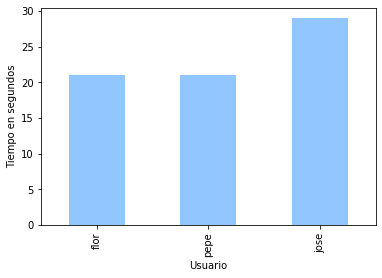

In [17]:
datos.plot.bar(y='Tiempo', xlabel = 'Usuario', ylabel='Tiempo en segundos', legend=False)

# Parte 2

**Dataset:** emojis.
**Criterio:** emojis de Google de animales.

In [74]:
# Cargo el dataset.
emojis = pd.read_csv('emojis.csv')

emojis

,#,emoji,unicode,name,base64img
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...,...,...
1811,1812,🇿🇲,U+1F1FF U+1F1F2,flag: Zambia,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1812,1813,🇿🇼,U+1F1FF U+1F1FC,flag: Zimbabwe,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1813,1814,🏴󠁧󠁢󠁥󠁮󠁧󠁿,U+1F3F4 U+E0067 U+E0062 U+E0065 U+E006E U+E006...,flag: England,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
1814,1815,🏴󠁧󠁢󠁳󠁣󠁴󠁿,U+1F3F4 U+E0067 U+E0062 U+E0073 U+E0063 U+E007...,flag: Scotland,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


In [75]:
# Los emojis de animales están entre los ids [510, 626]
emojis = emojis.iloc[510:626]

emojis

,#,emoji,unicode,name,base64img
510,511,🐒,U+1F412,monkey,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
511,512,🦍,U+1F98D,gorilla,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
512,513,🦧,U+1F9A7,orangutan,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
513,514,🐶,U+1F436,dog face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
514,515,🐕,U+1F415,dog,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
...,...,...,...,...,...
621,622,🦂,U+1F982,scorpion,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
622,623,🦟,U+1F99F,mosquito,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
623,624,🪰,U+1FAB0,fly,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
624,625,🪱,U+1FAB1,worm,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


In [76]:
# Me quedo solo con las palabras
emojis = emojis['name'].unique()

emojis

array(['monkey', 'gorilla', 'orangutan', 'dog face', 'dog', 'guide dog',
       'service dog', 'poodle', 'wolf', 'fox', 'raccoon', 'cat face',
       'cat', 'black cat', 'lion', 'tiger face', 'tiger', 'leopard',
       'horse face', 'horse', 'unicorn', 'zebra', 'deer', 'bison',
       'cow face', 'ox', 'water buffalo', 'cow', 'pig face', 'pig',
       'boar', 'pig nose', 'ram', 'ewe', 'goat', 'camel',
       'two-hump camel', 'llama', 'giraffe', 'elephant', 'mammoth',
       'rhinoceros', 'hippopotamus', 'mouse face', 'mouse', 'rat',
       'hamster', 'rabbit face', 'rabbit', 'chipmunk', 'beaver',
       'hedgehog', 'bat', 'bear', 'polar bear', 'koala', 'panda', 'sloth',
       'otter', 'skunk', 'kangaroo', 'badger', 'paw prints', 'turkey',
       'chicken', 'rooster', 'hatching chick', 'baby chick',
       'front-facing baby chick', 'bird', 'penguin', 'dove', 'eagle',
       'duck', 'swan', 'owl', 'dodo', 'feather', 'flamingo', 'peacock',
       'parrot', 'frog', 'crocodile', 'turtle'

In [83]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

emojis = str(emojis).replace("'", '')

wordcloud = WordCloud(
    width=1000, 
    height=800, 
    stopwords=STOPWORDS, 
    background_color='white', 
    colormap='Set2').generate(emojis)

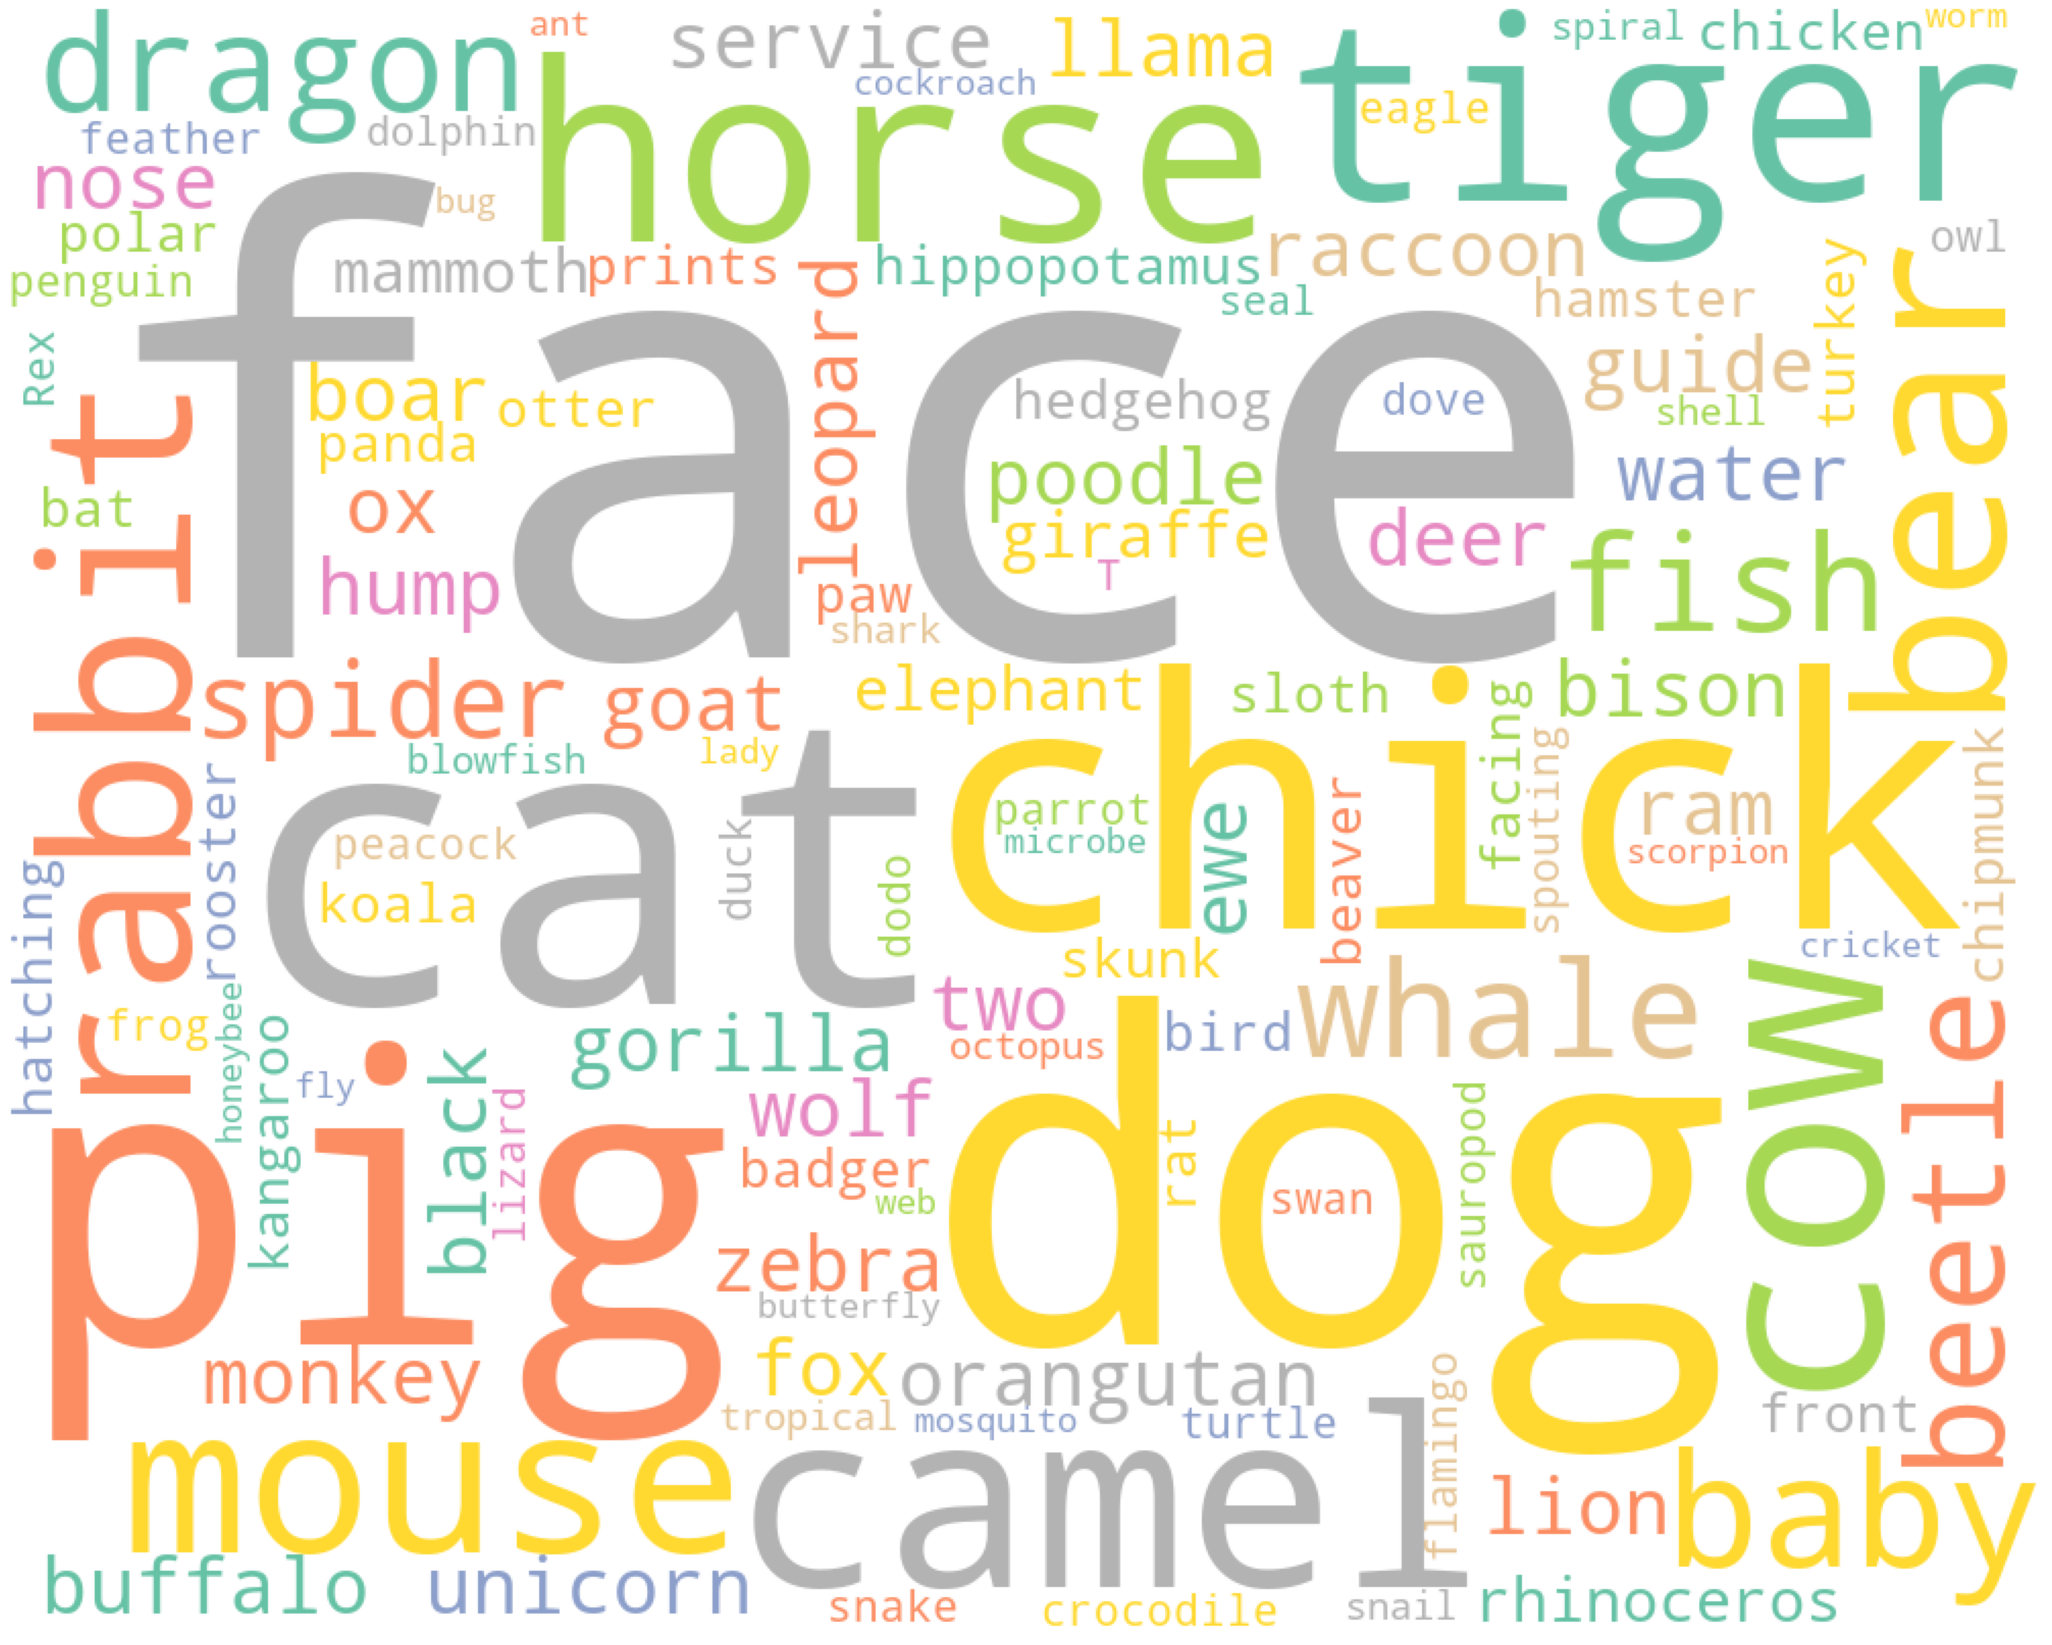

In [84]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off");